# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
#Импортируйте библиотеки pandas, numpy и matplotlib.
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from sklearn.datasets import load_boston
data = load_boston()

data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# Создайте датафреймы X и y из этих данных. 

X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

In [6]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train)  
# и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

X_train_scaled = pd.DataFrame(scaller.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaller.transform(X_test), columns=X_test.columns)

In [14]:
#Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
print(X_train_scaled.head(5))
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne[:5,:]

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.287702 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1 -0.336384 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2 -0.403253  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3  0.388230 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4 -0.325282 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.802173  1.706891  1.578434  0.845343 -0.074337  1.753505  
1  0.324349 -0.624360 -0.584648  1.204741  0.430184 -0.561474  
2  1.330697 -0.974048 -0.602724 -0.637176  0.065297 -0.651595  
3 -0.839240  1.706891  1.578434  0.845343 -3.868193  1.525387  
4 -0.005494 -0.624360 -0.584648  1.204741  0.379119 -0.165787  


array([[ 17.645624 ,  28.406218 ],
       [  1.6133794, -11.563689 ],
       [-14.5985   , -16.157717 ],
       [ 27.65398  ,  24.220755 ],
       [  3.8739002,  -9.40449  ]], dtype=float32)

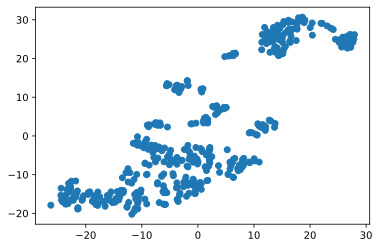

In [16]:
# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [31]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки 
# из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)


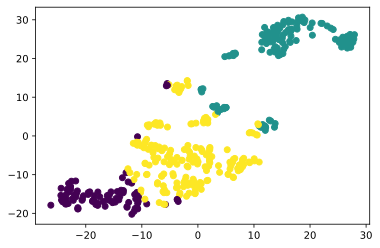

In [32]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, 
# и раскрасьте точки из разных кластеров разными цветами.

labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

#!!! ПЫТАЛСЯ ПОДОБРАТЬ max_iter ЧТОБ НЕ БЫЛО ВЫБРАСОВ(РАЗБРОСОВ ТОЧЕК) ИЗ КЛАСТЕРА(в изображениии ниже - первый же кластер), 
# НО НИЧЕГО НЕ ПОЛУЧИЛОСЬ. НЕ МОГЛИ БЫ ПОЯСНИТЬ КАК ПРАВИЛЬНО ПОДОБРАТЬ ЧТОБ ЭТИХ ВЫБРОСОВ НЕ БЫЛО

In [38]:
# Вычислите средние значения price и CRIM в разных кластерах.
for i in range(3):
    print(f'Кластер {i}, CRIM: {X_train.loc[labels_train == i, "CRIM"].mean()}')
    print(f'Кластер {i}, price: {Y_train[labels_train == i].mean()} \n')


Кластер 0, CRIM: 0.07356558139534886
Кластер 0, price: 27.78837209302326 

Кластер 1, CRIM: 10.797028425196853
Кластер 1, price: 16.165354330708663 

Кластер 2, CRIM: 0.42166020942408367
Кластер 2, price: 24.958115183246072 



* Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [47]:
labels_test = kmeans.predict(X_test_scaled)
labels_test 

for i in range(3):
    print(f'Кластер {i}, CRIM: {X_test.loc[labels_test == i, "CRIM"].mean()}')
    print(f'Кластер {i}, price: {Y_test[labels_test == i].mean()} \n')

# !!!ПОЯСНИТЕ ПОЖАЛУЙСТА ЧТО ТАКОЕ ЗА ФУНКЦИЯ fit, И В ЧЕМ ОТЛИЧСИЕ fit_predict ОТ predict

Кластер 0, CRIM: 0.062060000000000004
Кластер 0, price: 31.35 

Кластер 1, CRIM: 10.165531142857143
Кластер 1, price: 16.43714285714286 

Кластер 2, CRIM: 0.26607882352941176
Кластер 2, price: 21.860784313725492 

